In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_offers = pd.read_csv(r'C:\Users\arnau\Gett_project\data\data_offers.csv')

df_orders = pd.read_csv(r'C:\Users\arnau\Gett_project\data\data_orders.csv')

In [2]:
df_offers.head()
print(df_offers.shape)
df_offers.tail()
df_offers['order_gk'].value_counts()

(334363, 2)


order_gk
3000622541299    9
3000591156831    9
3000592296546    9
3000623018231    9
3000582817158    9
                ..
3000599186936    1
3000594272454    1
3000628607809    1
3000589832090    1
3000557510943    1
Name: count, Length: 97967, dtype: int64

In [3]:
df_orders.head()
df_orders.shape
df_orders.tail()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0
10715,11:49:35,-0.974738,51.458180,177.0,3000592871241,4,1,40.0


In [4]:
df_orders['order_gk'].value_counts()

order_gk
3000583041974    1
3000590782265    1
3000590781929    1
3000590807087    1
3000590806745    1
                ..
3000587756057    1
3000587655526    1
3000587756214    1
3000587806780    1
3000592871241    1
Name: count, Length: 10716, dtype: int64

In [5]:
df = df_orders.merge(df_offers, how='left', on='order_gk')
df_inner = df_orders.merge(df_offers, how='inner', on='order_gk')

df.tail()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
34369,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0,3.000516e+11
34370,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0,NaN
34371,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0,3.000516e+11
34372,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0,NaN
34373,11:49:35,-0.974738,51.458180,177.0,3000592871241,4,1,40.0,3.000514e+11


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34374 entries, 0 to 34373
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 34374 non-null  object 
 1   origin_longitude               34374 non-null  float64
 2   origin_latitude                34374 non-null  float64
 3   m_order_eta                    8838 non-null   float64
 4   order_gk                       34374 non-null  int64  
 5   order_status_key               34374 non-null  int64  
 6   is_driver_assigned_key         34374 non-null  int64  
 7   cancellations_time_in_seconds  23397 non-null  float64
 8   offer_id                       31268 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 2.4+ MB


In [7]:
df.isna().sum()

order_datetime                       0
origin_longitude                     0
origin_latitude                      0
m_order_eta                      25536
order_gk                             0
order_status_key                     0
is_driver_assigned_key               0
cancellations_time_in_seconds    10977
offer_id                          3106
dtype: int64

In [8]:
df.shape

(34374, 9)

In [9]:
cancelled_before_after = df_orders.groupby('is_driver_assigned_key').count()['order_gk']

cancelled_before_after.rename({0: 'not_assigned', 1: 'assigned'},inplace=True)

cancelled_before_after

is_driver_assigned_key
not_assigned    7902
assigned        2814
Name: order_gk, dtype: int64

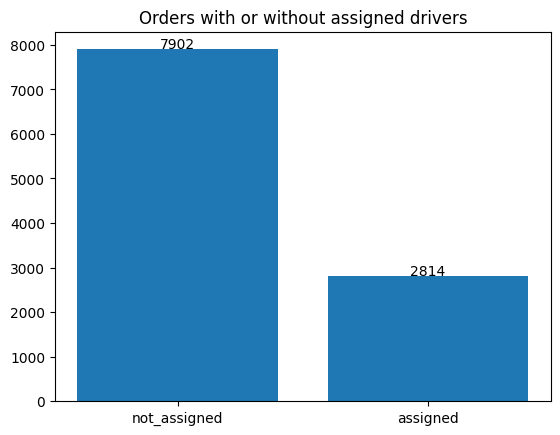

In [10]:

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 20, y[i], ha = 'center')

plt.bar(x=cancelled_before_after.index, height=cancelled_before_after.values)

plt.title('Orders with or without assigned drivers')
addlabels(cancelled_before_after.index, cancelled_before_after.values)
# plt.xlim(0,1)

plt.show()

In [11]:
cancelled_by_user_or_system = df_orders.groupby('order_status_key').count()['order_gk']

cancelled_by_user_or_system.rename({4: 'Cancelled by User', 9: 'Cancelled by System'}, inplace=True)

cancelled_by_user_or_system

order_status_key
Cancelled by User      7307
Cancelled by System    3409
Name: order_gk, dtype: int64

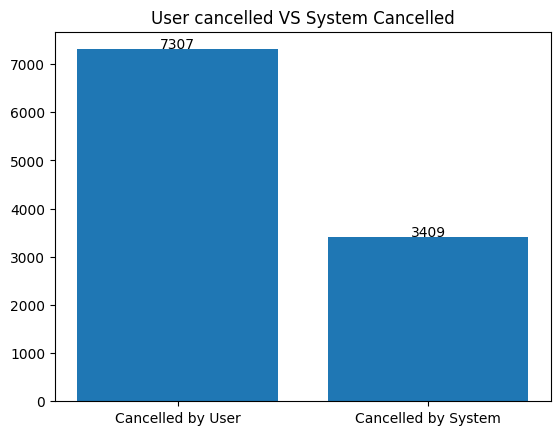

In [12]:
plt.title('User cancelled VS System Cancelled')
plt.bar(x=cancelled_by_user_or_system.index, height=cancelled_by_user_or_system.values)
addlabels(cancelled_by_user_or_system.index, cancelled_by_user_or_system.values)

In [38]:
df_orders['Hour'] = pd.to_datetime(df_orders['order_datetime'], format= '%H:%M:%S').dt.hour

df_orders

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,Hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,20
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,12
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,13
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,21
...,...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0,13
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0,13
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0,13
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0,13


In [14]:
cancelled_by_hour = df_orders.groupby('Hour').count()['order_gk']

<BarContainer object of 24 artists>

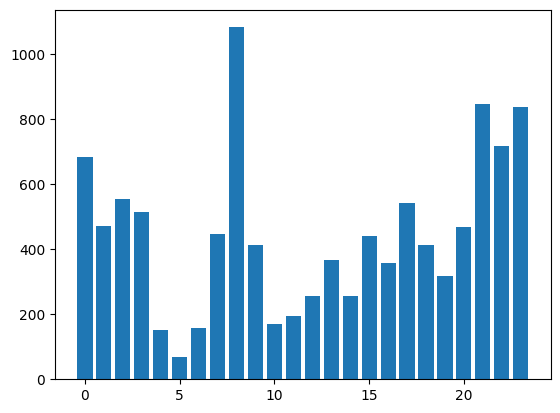

In [15]:
plt.bar(x=cancelled_by_hour.index, height=cancelled_by_hour.values)

(array([ 683.,  471.,  555.,  513.,  152.,   67.,  159.,  447., 1082.,
         412.,  170.,  193.,  256.,  366.,  256.,  439.,  356.,  541.,
         414.,  317.,  469.,  846.,  716.,  836.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

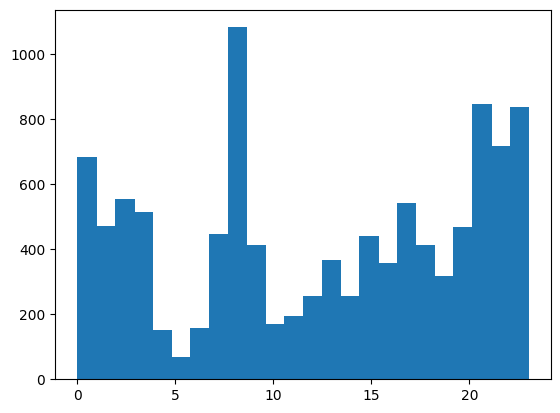

In [16]:
plt.hist(data=df_orders, x='Hour', bins=24, width=1)

(0.0, 1200.0)

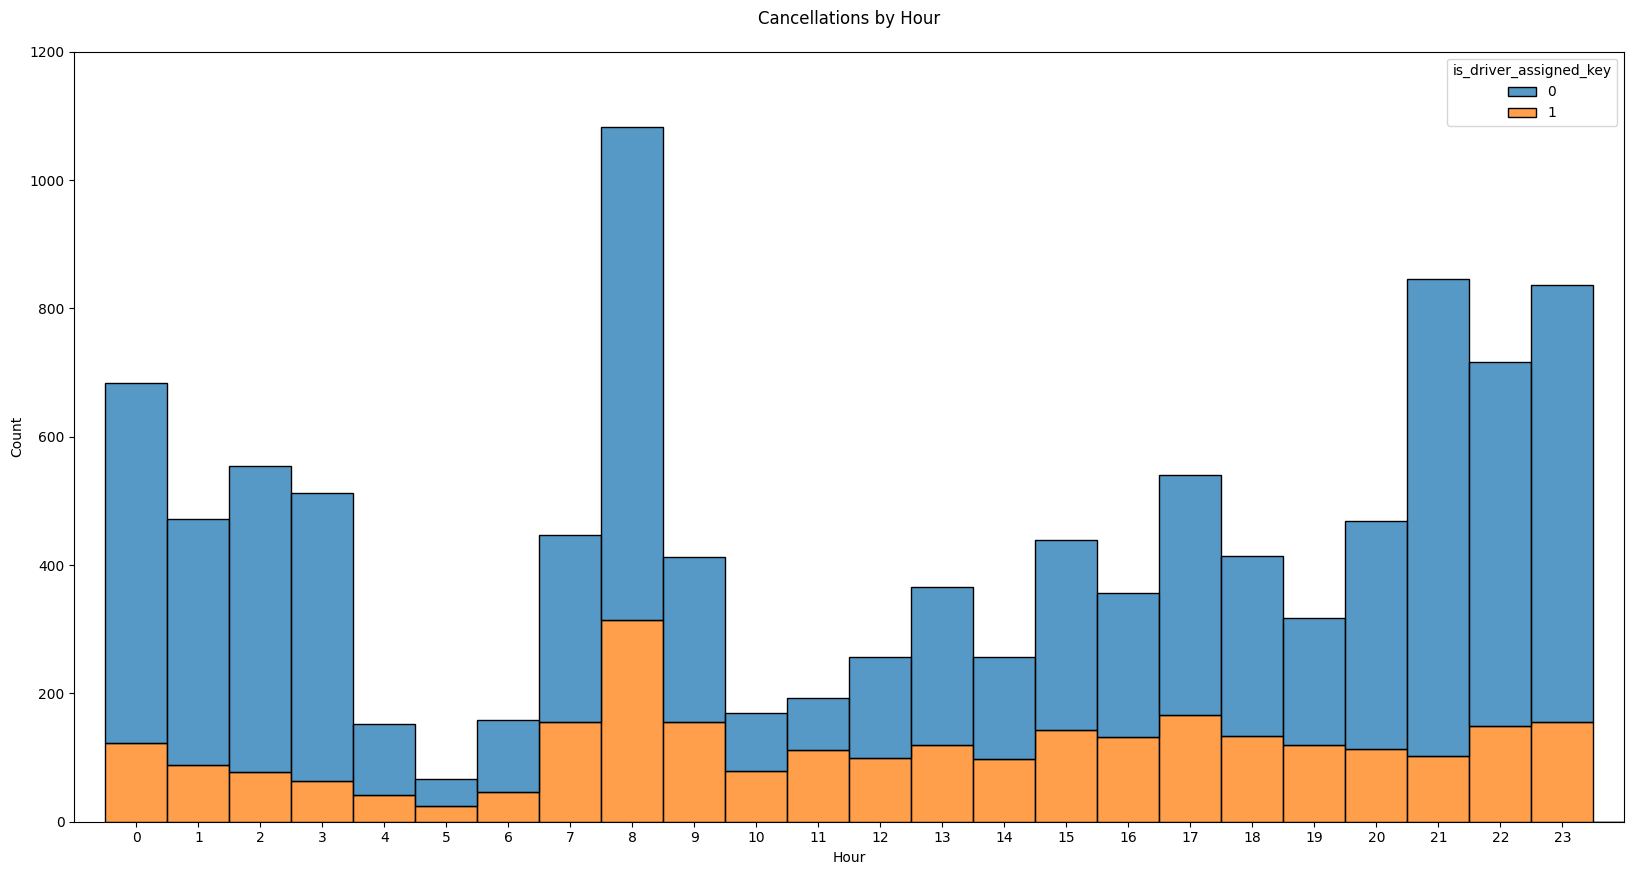

In [20]:
plt.figure(figsize=(20,10))
plt.title('Cancellations by Hour', pad=20)
sns.histplot(data=df_orders, x='Hour', binrange=(0,24), binwidth=1, discrete=True, hue='is_driver_assigned_key', multiple='stack')
plt.xlim(-1,24)
plt.xticks(range(0,24))
plt.ylim(0,1200)

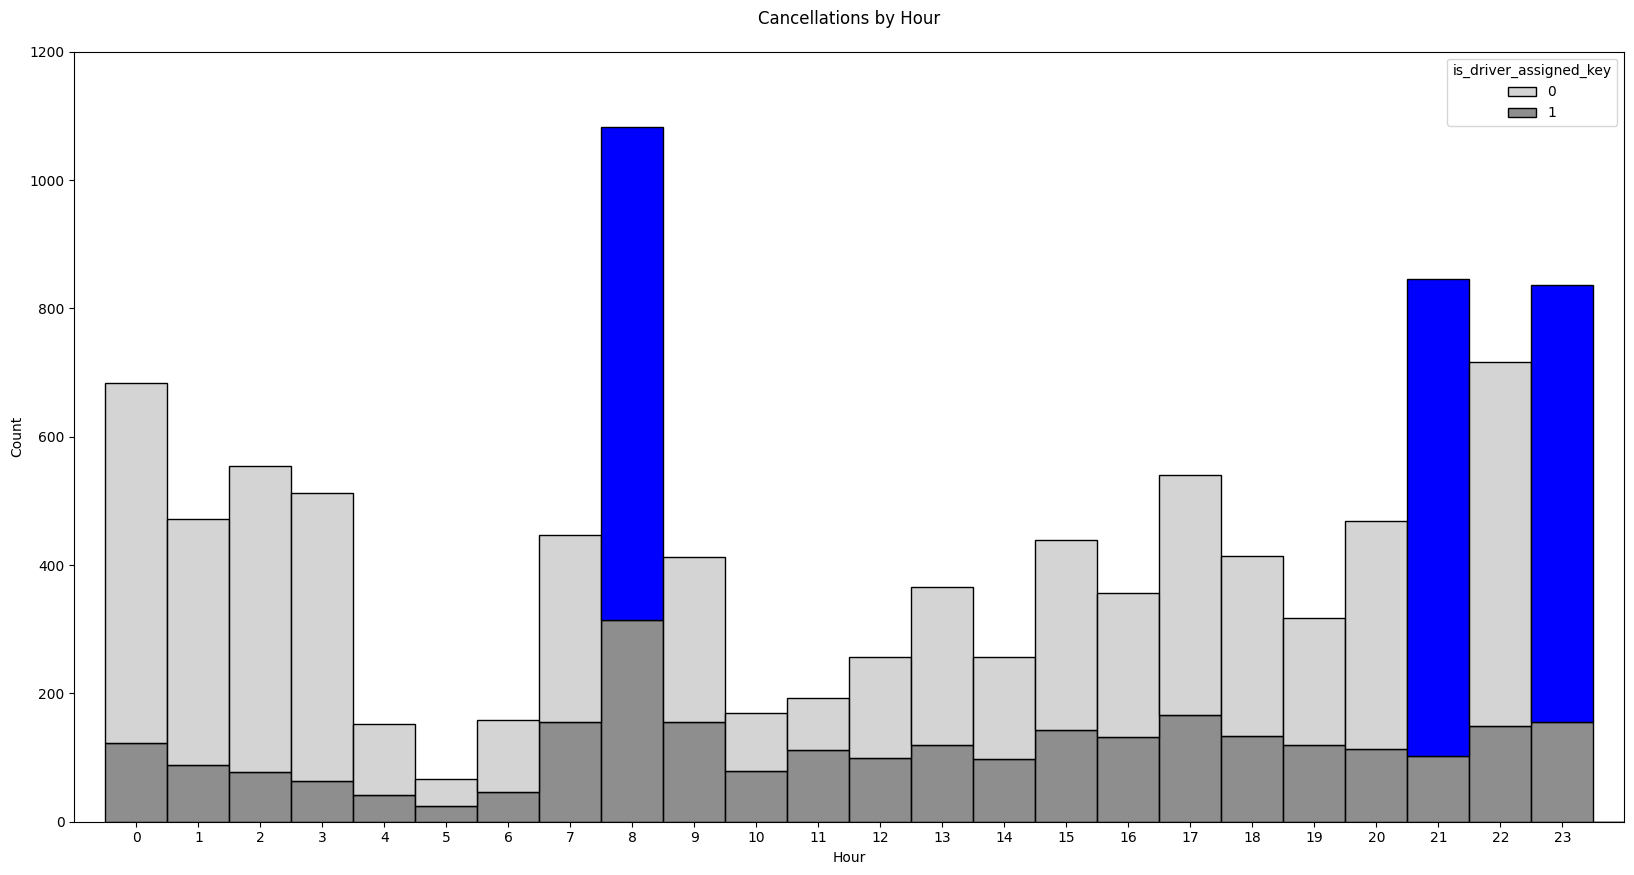

In [102]:
plt.figure(figsize=(20,10))
plt.title('Cancellations by Hour', pad=20)
ax = sns.histplot(data=df_orders, x='Hour', binrange=(0,24), binwidth=1, discrete=True, hue='is_driver_assigned_key', multiple='stack', palette='Greys')
plt.xlim(-1,24)
plt.xticks(range(0,24))
plt.ylim(0,1200)

heights = [p.get_height() for p in ax.patches]
third_highest = sorted(heights)[-3]
for p in ax.patches:
    if  p.get_height() >= third_highest:
        p.set_facecolor('blue')

plt.show()

To obtain the desired graph I could supperpose 4 different graphs.
1 Graph showing the total count of failed orders, next a graph showing the failed orders where a driver was assigned. (This would give me the same graph as now)

In [40]:
assigned_drivers_df = df_orders[df_orders['is_driver_assigned_key'] == 1].copy()

assigned_drivers_df

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,Hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,18
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,12
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,13
13,16:55:28,-0.950683,51.451368,538.0,3000583016613,4,1,188.0,16
14,00:59:26,-0.937006,51.448696,179.0,3000582566041,4,1,316.0,0
...,...,...,...,...,...,...,...,...,...
10701,23:53:09,-0.976553,51.455485,178.0,3000589481691,4,1,833.0,23
10703,13:15:55,-0.975372,51.457846,60.0,3000599187005,4,1,28.0,13
10704,13:12:51,-0.975372,51.457846,60.0,3000599186936,4,1,59.0,13
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0,13


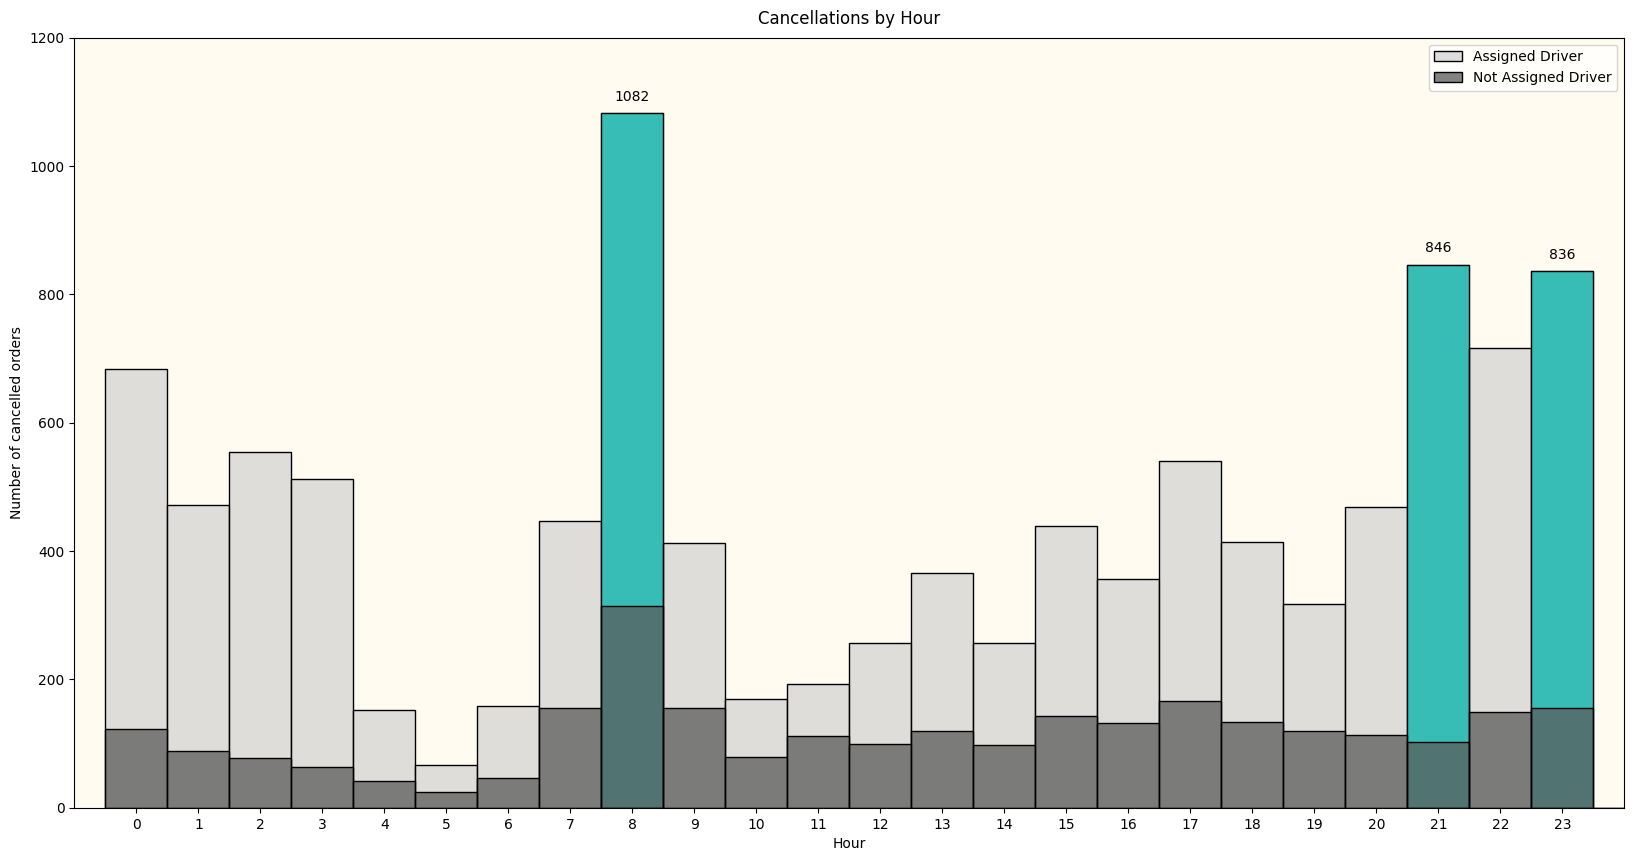

In [99]:
# We first start by importing Rectangle from matplotlib to be able to draw customized shapes onto our Graph

from matplotlib.patches import Rectangle

# Let's then define the space inwhich we will draw our graph along with the title.
# As we only want to see 24 hours we set the limit of the x axis to 24, and for the y-axis we set the maximum limit to 1200
# Lastly we rename the y-axis label to make it understandable that we are plotting the cancelled orders

plt.figure(figsize=(20,10))
plt.title('Cancellations by Hour', pad=10)
plt.xlim(-1,24)
plt.xticks(range(0,24))
plt.ylim(0,1200)
plt.ylabel('Number of cancelled orders')


# We start by plotting the total numober of cancelled orders by hours
# and then add another plot on top to show the proportion of cancelled orders that had an assigned driver
# Lastly to make our plot more readable we add a legend to it.

ax = sns.histplot(data=df_orders, x='Hour', binrange=(0,24), binwidth=1, discrete=True, color='#D3D3D3')

sns.histplot(data=assigned_drivers_df, x='Hour', binrange=(0,24), binwidth=1, discrete=True, color='#5A5A5A')

plt.legend(labels=['Assigned Driver', 'Not Assigned Driver'])

# As this plot doesn't highlight anything in particular we want to make the top 3 hours with the most cancellation stand out.
# Therefore we first get a list of heights from our plot and assigning it to a 'heights' list.
# Then we get the height of the hour with the 3rd most cancellation and assign it to the variable 'third_highest'.
# Using an if statement we check if the ax.patches height is higher or equal to this height and if True set a determined color.
# As we also want this rectangle to have borders we add a empty rectangle with black borders on top of the graph.
# Lastly, we want to see exactly how many orders were cancelled in these three hours so we use the plt.text method to add it to the graph.

heights = [p.get_height() for p in ax.patches]
third_highest = sorted(heights)[-3]
for p in ax.patches:
    if  p.get_height() >= third_highest:
        p.set_color('#37BDB5')
        ax.add_patch( Rectangle(p.get_xy(), width=1, height=p.get_height(), fc='None', ec='black'))
        plt.text(x=p.get_x()+0.5, y=p.get_height() + 20, s= p.get_height(), ha='center')


# To change slightly the color of the background of the plot we change it to this warmer color

ax.set_facecolor('#FFFBF0')

plt.show()

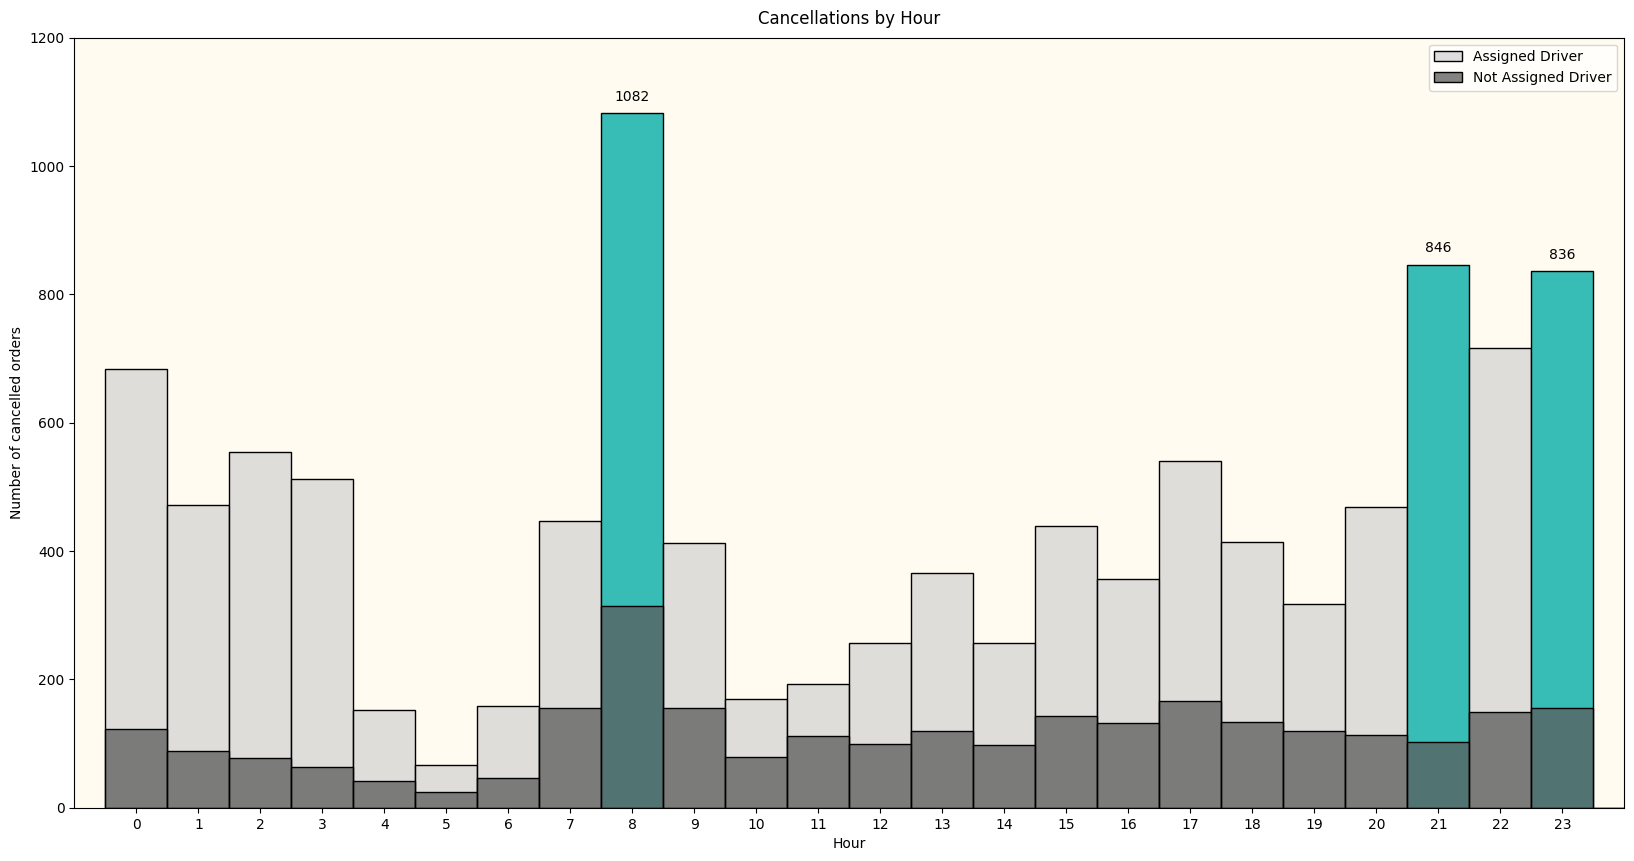

In [101]:
# We first start by importing Rectangle from matplotlib to be able to draw customized shapes onto our Graph

from matplotlib.patches import Rectangle

# Let's then define the space inwhich we will draw our graph along with the title.
# As we only want to see 24 hours we set the limit of the x axis to 24, and for the y-axis we set the maximum limit to 1200
# Lastly we rename the y-axis label to make it understandable that we are plotting the cancelled orders

plt.figure(figsize=(20,10))
plt.title('Cancellations by Hour', pad=10)
plt.xlim(-1,24)
plt.xticks(range(0,24))
plt.ylim(0,1200)
plt.ylabel('Number of cancelled orders')


# We start by plotting the total numober of cancelled orders by hours
# and then add another plot on top to show the proportion of cancelled orders that had an assigned driver
# Lastly to make our plot more readable we add a legend to it.

ax = sns.histplot(data=df_orders, x='Hour', binrange=(0,24), binwidth=1, discrete=True, color='#D3D3D3')

sns.histplot(data=assigned_drivers_df, x='Hour', binrange=(0,24), binwidth=1, discrete=True, color='#5A5A5A')

plt.legend(labels=['Assigned Driver', 'Not Assigned Driver'])

# As this plot doesn't highlight anything in particular we want to make the top 3 hours with the most cancellation stand out.
# Therefore we first get a list of heights from our plot and assigning it to a 'heights' list.
# Then we get the height of the hour with the 3rd most cancellation and assign it to the variable 'third_highest'.
# Using an if statement we check if the ax.patches height is higher or equal to this height and if True set a determined color.
# Lastly, we want to see exactly how many orders were cancelled in these three hours so we use the plt.text method to add it to the graph.

heights = [p.get_height() for p in ax.patches]
third_highest = sorted(heights)[-3]
for p in ax.patches:
    if  p.get_height() >= third_highest:
        p.set_facecolor('#37BDB5')
        plt.text(x=p.get_x()+0.5, y=p.get_height() + 20, s= p.get_height(), ha='center')


# To change slightly the color of the background of the plot we change it to this warmer color

ax.set_facecolor('#FFFBF0')

plt.show()